In [27]:
import pybamm as pb;import pandas as pd   ;import numpy as np;import os;import matplotlib.pyplot as plt;import os;#import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl, sys
import traceback,pickle
import multiprocessing
import scipy.optimize
import random;import time, signal

In [28]:
str_path_0 = os.path.abspath(os.path.join(pb.__path__[0],'..'))
str_path_1 = os.path.abspath(os.path.join(str_path_0,"wip/Rio_Code/Fun_P3"))
sys.path.append(str_path_1) 
from Fun_P3 import *

In [29]:
fs=12;
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

In [30]:
Index = np.arange(1,3+1) 
BasicPath = os.path.expanduser("~/EnvPBGEM_ECDrag2/Double_SimSave/Double_Trans/")
""" Targets = [
    "Long_int=1e_19_2000cyc","Long_int=3e_19_2000cyc2",
    ] """
target = "Long_int=3e_19_2000cyc2"

In [31]:
# collect .xlsx result if haven't
# for target in Targets:
i_find = target.index('=')
book_name_xlsx = target[0:i_find] + '.xlsx'
for k in Index:
    old_book = str(k) + '_' + book_name_xlsx
    #print(old_book)
    #open excel:
    try:   # use try just in case some cases fail
        data_old = openpyxl.load_workbook(BasicPath + target +'/' + old_book)   
        data_tar = openpyxl.load_workbook(BasicPath + target +'/' + book_name_xlsx) 

        table_old = data_old[str(k)]
        nrows_old = table_old.max_row  # 获得行数
        ncolumns_old = table_old.max_column  # 获得列数

        tar_sheet_name_xlsx = 'Results';
        table_tar = data_tar[tar_sheet_name_xlsx]
        nrows_tar = table_tar.max_row  # 获得行数
        ncolumns_old = table_old.max_column  # 获得列数
        list_old = [];
        #print(nrows_old,nrows_tar)
        for i in range(1,nrows_old+1):
            for j in range(1,ncolumns_old+1):
                list_old.append(table_old.cell(row=i,column=j).value)

        list_old = [list_old,]
        for i in range(1, len(list_old)+1):
            for j in range(1, len(list_old[i-1])+1):
                #print(i,j,list_old[i-1][j-1]    )
                table_tar.cell(nrows_tar+i, j).value = list_old[i-1][j-1]     
        data_tar.save(BasicPath + target +'/' + book_name_xlsx) 
        data_tar.close()
    except:
        print(f"Something goes wrong for Scan {k} for folder {target}!")
    else:
        print(f"Successfuly write results for Scan {k} for folder {target}!") 


Successfuly write results for Scan 1 for folder Long_int=3e_19_2000cyc2!
Successfuly write results for Scan 2 for folder Long_int=3e_19_2000cyc2!
Successfuly write results for Scan 3 for folder Long_int=3e_19_2000cyc2!


In [36]:
# Reload all scans in this round! 
""" for many targets:
Scan_Num = [3,3]
Round240327 = {}
for target,scan_num in zip(Targets,Scan_Num):
    Round240327[target] = {}
    Scans = np.arange(1,scan_num+1,1).tolist()
    for scan in Scans:
        Round240327[target][str(scan)]={}
        try:
            Round240327[target][str(scan)] = loadmat( 
            BasicPath  +   target+ "/" + str(scan) + "th Scan/" 
            + str(scan)+ "th Scan-for_AGE_only.mat")
        except:
            print(f"Nothing in {target}, Scan {scan}") """
# for one target:
scan_num = 3
Round240327 = {}
Round240327[target] = {}
Scans = np.arange(1,scan_num+1,1).tolist()
for scan in Scans:
    Round240327[target][str(scan)]={}
    try:
        with open(
            BasicPath + target + f"/{scan}th Scan/" 
            + f"{scan}th Scan" + '-for_AGE_only.pkl', 'rb') as file:
            midc_merge = pickle.load(file)
        # [my_dict_AGE, mdic_cycles] = midc_merge 
        Round240327[target][str(scan)] = midc_merge
    except:
        print(f"Nothing in {target}, Scan {scan}") 


In [63]:
for k,Scan_i in enumerate(reversed(Scans)):
    print(k,Scan_i)

0 3
1 2
2 1


For case Model_SD  capacity loss is 6.252520414950247%
For case Model_SD  SEI loss is 5.648239924599152%
For case Model_DD-LDx  capacity loss is 6.2815080796080895%
For case Model_DD-LDx  SEI loss is 5.6868747089901115%
For case Model_DD-HDx  capacity loss is 6.369072149661159%
For case Model_DD-HDx  SEI loss is 5.76314646237973%


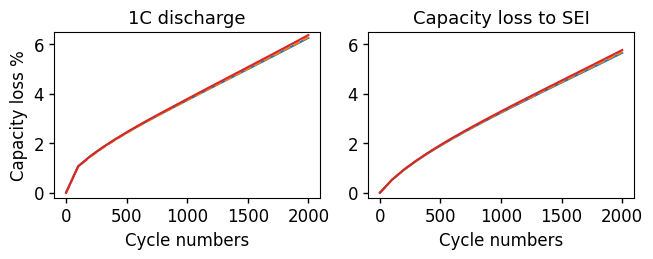

In [67]:
#target = Targets[1]; 
fs = 12; font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

dpi=800
Colors = ['#d62728','#ff7f0e','#1f77b4',];Markers   = ["none","none","none","none"];
LS = ['-','--','-','--']
Labels = ['Model_DD-HDx' ,'Model_DD-LDx','Model_SD' ] 
Scans = np.arange(1,scan_num+1,1).tolist()

fig, axs = plt.subplots(1,2, figsize=(17/2.54,7/2.54),tight_layout=True)
for Scan_i in reversed(Scans):
    k = Scan_i - 1
    cap_temp = Round240327[target][str(Scan_i)][0]["Discharge capacity [A.h]"]
    axs[0].plot(
        Round240327[target][str(Scan_i)][1]["Full_cycle"], 
        (1-cap_temp/cap_temp[0])*100,
        color=Colors[k],linestyle=LS[k],  label=Labels[k])   # marker=Markers[k],
    print(f"For case {Labels[k]}",f" capacity loss is {((1-cap_temp[-1]/cap_temp[0])*100)}%")
    axs[0].set_ylabel("Capacity loss %",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[0].set_title("1C discharge",   fontdict={'family':'DejaVu Sans','size':fs+1})
    cap_sei = Round240327[target][str(Scan_i)][0]["CDend Loss of capacity to SEI [A.h]"]
    axs[1].plot(
        Round240327[target][str(Scan_i)][1]["Full_cycle"], 
        cap_sei / cap_temp[0] * 100 , 
        color=Colors[k],linestyle=LS[k],  label=Labels[k])
    print(f"For case {Labels[k]}",f" SEI loss is {((cap_sei[-1]/cap_temp[0])*100)}%")
    #axs[1].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[1].set_title("Capacity loss to SEI",   fontdict={'family':'DejaVu Sans','size':fs+1})

    """ axs[2].plot(
        Round240327[target][str(Scan_i)][1]["Full_cycle"], 
        Round240327[target][str(Scan_i)][0]["CDend Local ECM resistance [Ohm]"][0], 
        color=Colors[k],marker=Markers[k],linestyle=Linestyles[k],  label=Labels[k])
    axs[2].set_ylabel("Resistance [Ohm]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[2].set_title("Local ECM resistance",   fontdict={'family':'DejaVu Sans','size':fs+1}) """
    for i in range(0,2):
        axs[i].set_ylim(-0.2,6.5); 
        axs[i].set_xlabel("Cycle numbers",   fontdict={'family':'DejaVu Sans','size':fs})
        axs[i].tick_params(labelcolor='k', labelsize=fs, width=1)
    #axs[1].legend(prop={'family':'DejaVu Sans','size':fs-6},loc='best',frameon=False)


plt.savefig(BasicPath +   target+ "/Cap loss in percentage Single_Double_Both_Dx.png", dpi=dpi)
plt.savefig(BasicPath +   target+ "/Cap loss in percentage Single_Double_Both_Dx.svg")

In [68]:
6.369072149661159 - 6.252520414950247

0.11655173471091196

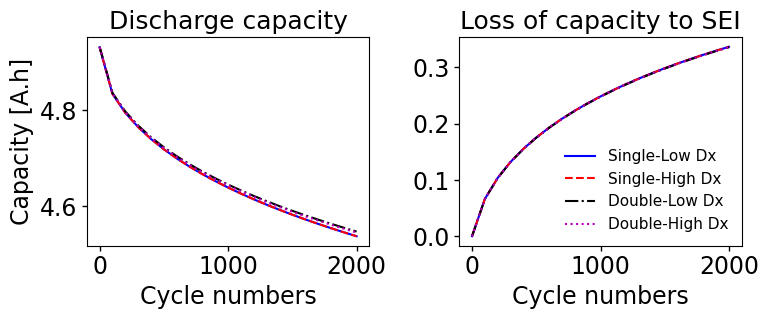

In [30]:
target = "Landes_sol=5e_21_2000cyc"; dpi=600
Colors    = ["b","r","k","m"];Markers   = ["none","none","none","none"];Linestyles= ["-","--","-.",":"]
Labels = ["Single-Low Dx","Single-High Dx","Double-Low Dx","Double-High Dx",] 
Scans = [4,3,6,5]; 
fig, axs = plt.subplots(1,2, figsize=(8,3.5),tight_layout=True)
for k,Scan_i in enumerate(Scans):
    axs[0].plot(
        Round240327[target][str(Scan_i)][1]["Full_cycle"], 
        Round240327[target][str(Scan_i)][0]["Discharge capacity [A.h]"][0],
        color=Colors[k],marker=Markers[k],linestyle=Linestyles[k],  label=Labels[k])
    axs[0].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[0].set_title("Discharge capacity",   fontdict={'family':'DejaVu Sans','size':fs+1})

    axs[1].plot(
        Round240327[target][str(Scan_i)][1]["Full_cycle"], 
        Round240327[target][str(Scan_i)][0]["CDend Loss of capacity to SEI [A.h]"][0], 
        color=Colors[k],marker=Markers[k],linestyle=Linestyles[k],  label=Labels[k])
    #axs[1].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[1].set_title("Loss of capacity to SEI",   fontdict={'family':'DejaVu Sans','size':fs+1})
    for i in range(0,2):
        axs[i].set_xlabel("Cycle numbers",   fontdict={'family':'DejaVu Sans','size':fs})
        axs[i].tick_params(labelcolor='k', labelsize=fs, width=1)
    axs[1].legend(prop={'family':'DejaVu Sans','size':fs-6},loc='best',frameon=False)
plt.savefig(BasicPath +   target+ "Single_Double_Both_Dx.png", dpi=dpi)

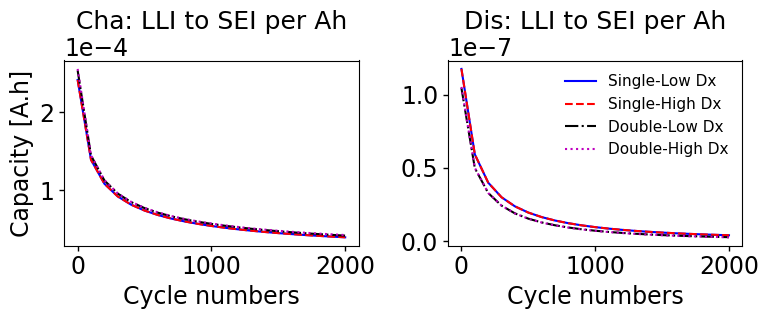

In [38]:
target = "Landes_int=1e_19_2000cyc"; dpi=600
Colors    = ["b","r","k","m"];Markers   = ["none","none","none","none"];Linestyles= ["-","--","-.",":"]
Labels = ["Single-Low Dx","Single-High Dx","Double-Low Dx","Double-High Dx",] 
Scans = [4,3,6,5]; 
fig, axs = plt.subplots(1,2, figsize=(8,3.5),tight_layout=True)
for k,Scan_i in enumerate(Scans):
    axs[0].plot(
        Round240327[target][str(Scan_i)][1]["Full_cycle"], 
        Round240327[target][str(Scan_i)][0]["Cha LLI to SEI per Ah"][0],
        color=Colors[k],marker=Markers[k],linestyle=Linestyles[k],  label=Labels[k])
    axs[0].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[0].set_title("Cha: LLI to SEI per Ah",   fontdict={'family':'DejaVu Sans','size':fs+1})

    axs[1].plot(
        Round240327[target][str(Scan_i)][1]["Full_cycle"], 
        Round240327[target][str(Scan_i)][0]["Dis LLI to SEI per Ah"][0], 
        color=Colors[k],marker=Markers[k],linestyle=Linestyles[k],  label=Labels[k])
    #axs[1].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[1].set_title("Dis: LLI to SEI per Ah",   fontdict={'family':'DejaVu Sans','size':fs+1})
    for i in range(0,2):
        axs[i].set_xlabel("Cycle numbers",   fontdict={'family':'DejaVu Sans','size':fs})
        axs[i].ticklabel_format( 
            axis='y', style='sci',scilimits=[-0.01,0.01], 
            useOffset=None, useLocale=None, useMathText=None)
        axs[i].tick_params(labelcolor='k', labelsize=fs, width=1)
    axs[1].legend(prop={'family':'DejaVu Sans','size':fs-6},loc='best',frameon=False)
plt.savefig(BasicPath +   target+ "LLI to SEI both charge and discharge.png", dpi=dpi)

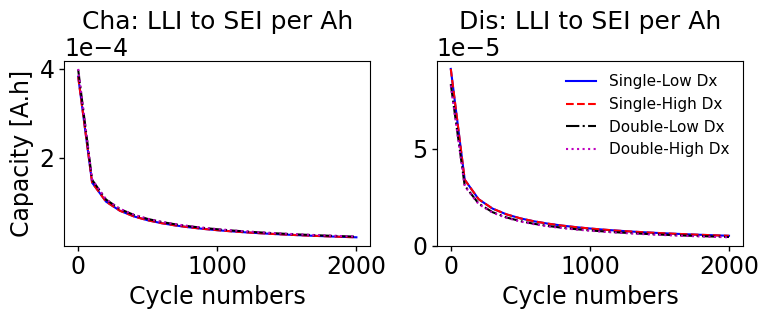

In [37]:
target = "Landes_sol=5e_21_2000cyc"; dpi=600
Colors    = ["b","r","k","m"];Markers   = ["none","none","none","none"];Linestyles= ["-","--","-.",":"]
Labels = ["Single-Low Dx","Single-High Dx","Double-Low Dx","Double-High Dx",] 
Scans = [4,3,6,5]; 
fig, axs = plt.subplots(1,2, figsize=(8,3.5),tight_layout=True)
for k,Scan_i in enumerate(Scans):
    axs[0].plot(
        Round240327[target][str(Scan_i)][1]["Full_cycle"], 
        Round240327[target][str(Scan_i)][0]["Cha LLI to SEI per Ah"][0],
        color=Colors[k],marker=Markers[k],linestyle=Linestyles[k],  label=Labels[k])
    axs[0].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[0].set_title("Cha: LLI to SEI per Ah",   fontdict={'family':'DejaVu Sans','size':fs+1})

    axs[1].plot(
        Round240327[target][str(Scan_i)][1]["Full_cycle"], 
        Round240327[target][str(Scan_i)][0]["Dis LLI to SEI per Ah"][0], 
        color=Colors[k],marker=Markers[k],linestyle=Linestyles[k],  label=Labels[k])
    #axs[1].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[1].set_title("Dis: LLI to SEI per Ah",   fontdict={'family':'DejaVu Sans','size':fs+1})
    for i in range(0,2):
        axs[i].set_xlabel("Cycle numbers",   fontdict={'family':'DejaVu Sans','size':fs})
        axs[i].ticklabel_format( 
            axis='y', style='sci',scilimits=[-0.01,0.01], 
            useOffset=None, useLocale=None, useMathText=None)
        axs[i].tick_params(labelcolor='k', labelsize=fs, width=1)
    axs[1].legend(prop={'family':'DejaVu Sans','size':fs-6},loc='best',frameon=False)
plt.savefig(BasicPath +   target+ "LLI to SEI both charge and discharge.png", dpi=dpi)